In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn import datasets 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [133]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [160]:
from sklearn.tree import export_graphviz
from graphviz import Digraph


In [138]:
iris = datasets.load_iris()
iris.feature_names
iris.data[:10]
iris.target_names
iris.target
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [178]:
X=iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=iris_frame['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)
clf_model=DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=7, min_samples_leaf=7)   
clf_model.fit(X_train,y_train)
y_predict=clf_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))


Accuracy: 1.0


In [148]:
importances=clf_model.feature_importances_
print(importances)
print(clf_model.classes_)

[0.00722162 0.         0.42154177 0.57123661]
[0 1 2]


In [180]:
print(clf_model.max_features_)
print(clf_model.n_classes_)
print(clf_model.n_features_in_)
print(clf_model.n_outputs_)


4
3
4
1


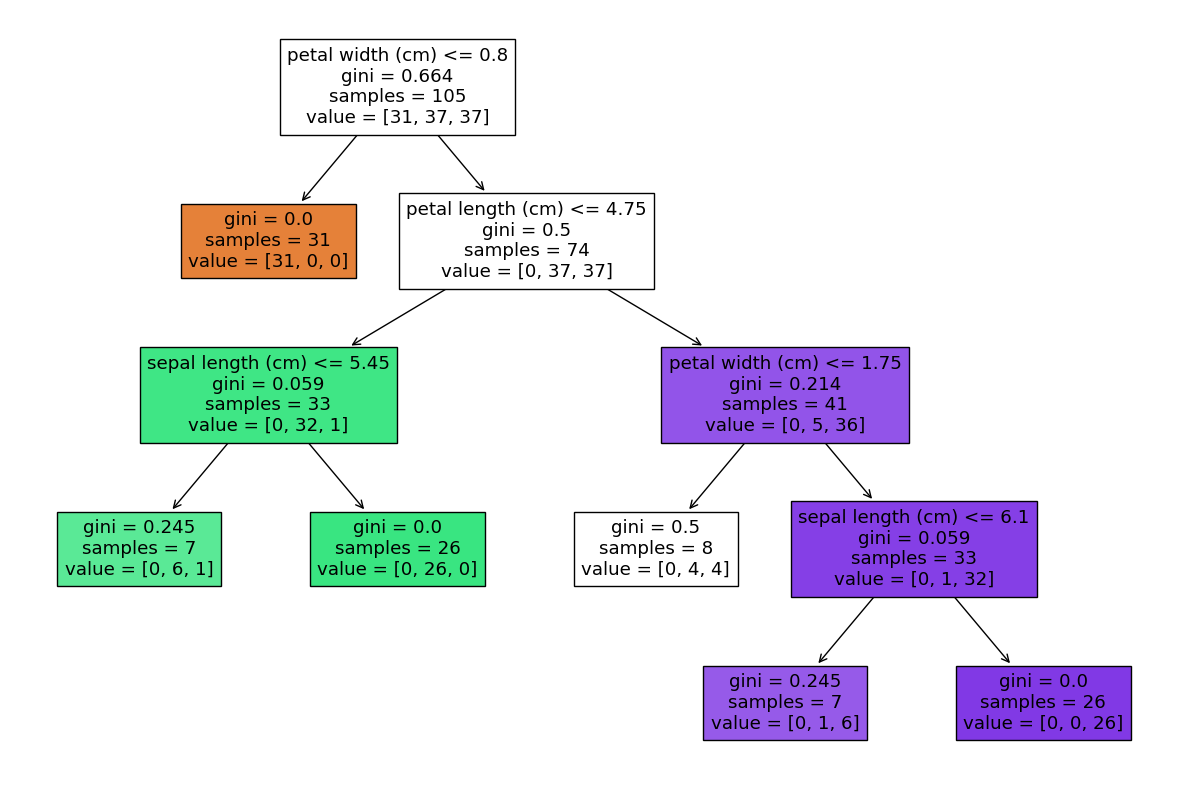

In [109]:
fig=plt.figure(figsize=(15,10))
res=tree.plot_tree(clf_model,feature_names=iris.feature_names,filled=True)

In [173]:
#pip install pydotplus

In [174]:

#conda install -c anaconda graphviz


In [175]:

import graphviz as g

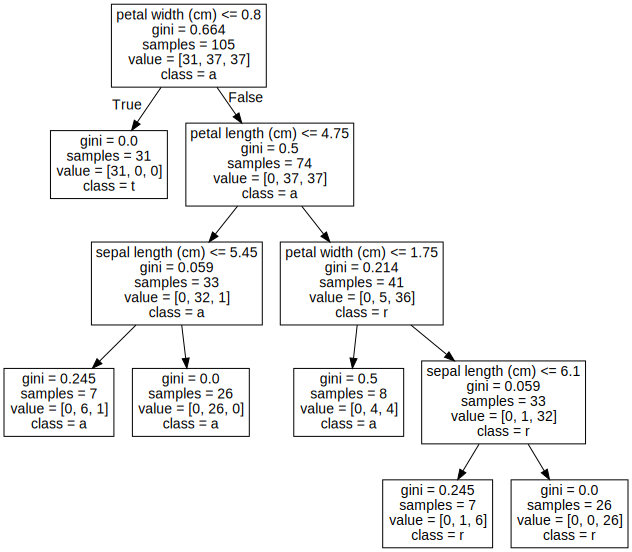

In [176]:
target=list(iris_frame['target'].unique())
feature_names=list(X.columns)
dot_data = tree.export_graphviz(clf_model,feature_names=iris.feature_names,class_names='target')  
graph=g.Source(dot_data)
graph

In [181]:
from sklearn.model_selection import GridSearchCV

In [185]:
param_grid={
    'max_depth':range(1,90,2),
    'min_samples_leaf':range(1,10,1),
    'max_leaf_nodes':range(1,500,10)
}
reg=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,n_jobs=2)
reg.fit(X_train,y_train)
three_model=reg.best_estimator_
print(reg.best_score_,reg.best_params_)

C:\Users\38098\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2025 fits failed out of a total of 101250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2025 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\38098\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\38098\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\38098\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warn

0.9428571428571428 {'max_depth': 5, 'max_leaf_nodes': 11, 'min_samples_leaf': 3}


C:\Users\38098\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91428571 0.91428571 0.91428571]
  warnings.warn(
